In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## One-class SVM

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/def-au1t/AGH_8_SISI/master/processed_data_rpi2.csv')
df = df[df['cpu'] == 0]
df.sort_values(by=['timestamp'], inplace=True)

In [ ]:
df_avg = df[['processed', 'timestamp']]
df_avg['timestamp']= pd.to_datetime(df_avg['timestamp'], unit='s')
df_avg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,processed,timestamp
0,44.107407,2022-04-13 10:09:18.838000128
1,42.885185,2022-04-13 10:10:18.838000128
2,40.933637,2022-04-13 10:11:18.838000128
3,42.015282,2022-04-13 10:12:18.838000128
4,42.270370,2022-04-13 10:13:18.838000128
...,...,...
20169,37.181481,2022-04-27 10:05:18.838000128
20170,37.741020,2022-04-27 10:06:18.838000128
20171,41.189041,2022-04-27 10:07:18.838000128
20172,40.966970,2022-04-27 10:08:18.838000128


In [ ]:
# convert df_load timestamp into progress of the day:
df_avg['hour'] = df_avg['timestamp'].dt.hour  + df_avg['timestamp'].dt.minute / 60

# convert df_load timestamp into day of week
df_avg['dayofweek'] = pd.to_datetime(df_avg['timestamp'], unit='s').dt.dayofweek

df_avg = df_avg[(df_avg['timestamp'] > '2022-04-18') & (df_avg['timestamp'] < '2022-04-25')]
#  save in df_2 without timestamp
df_2 = df_avg[['hour', 'dayofweek', 'processed']]

df_2


,hour,dayofweek,processed
6595,0.000000,0,8.225987
6596,0.016667,0,11.037078
6597,0.033333,0,12.925830
6598,0.050000,0,13.922119
6599,0.066667,0,13.737037
...,...,...,...
16677,23.916667,6,9.414710
16678,23.933333,6,8.118519
16679,23.950000,6,7.422250
16680,23.966667,6,7.896238


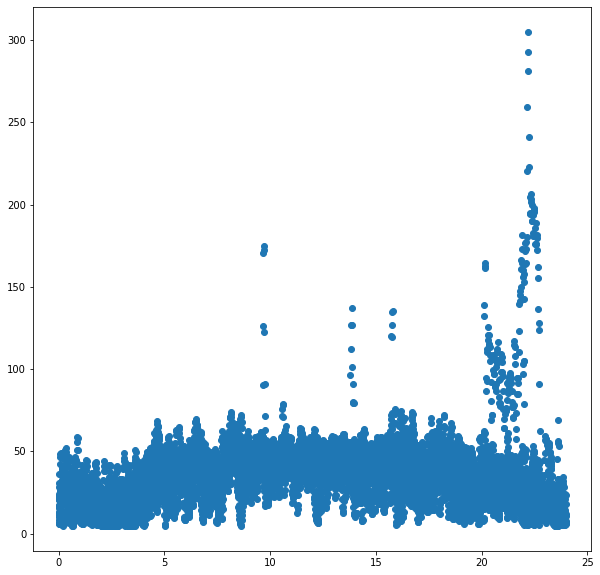

In [ ]:
from math import pi

# Import pyplot
import matplotlib.pyplot as plt


# convert to 2d polar corrdinate system where r is processed value
r = df_2['processed']
alpha = df_2['hour']/24*(2*pi)

# create output df

# convert r and alpha to cartesian coordinates and save in result
x = r*np.cos(alpha)
y = r*np.sin(alpha)

df_out = pd.DataFrame(columns=['x', 'y'])
df_out['x'] = df_2['hour']
df_out['y'] = df_2['processed']

# plot x and y
plt.figure(figsize=(10,10))
plt.scatter(df_out['x'], df_out['y'])
plt.show()



In [ ]:
df_polar = pd.DataFrame(columns=['x', 'y'])
df_polar['x'] = x
df_polar['y'] = y

305


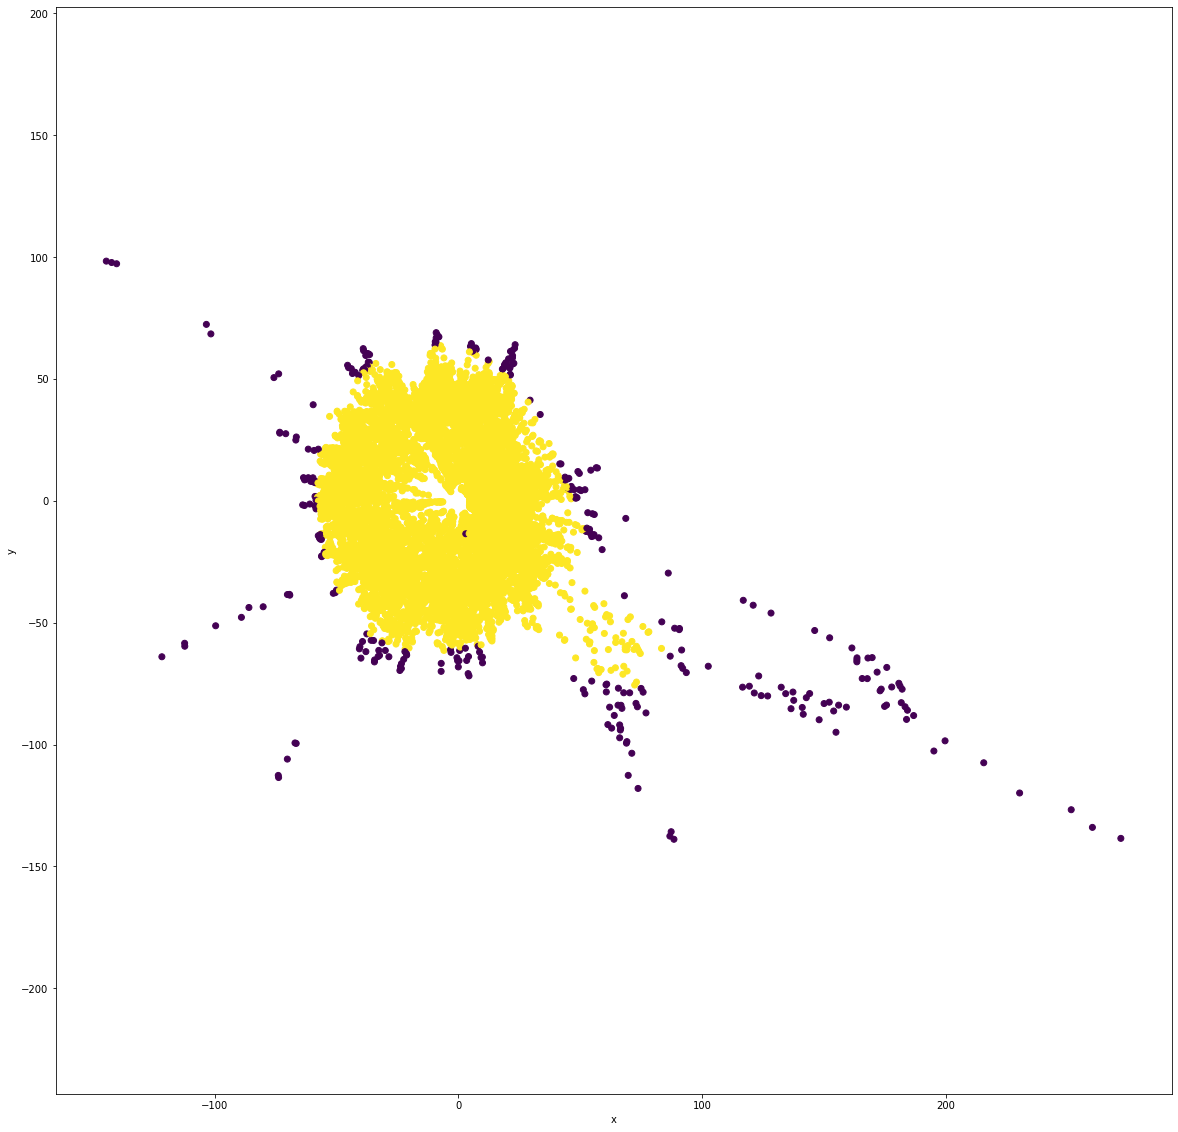

In [ ]:
# detect outliers using one-class SVM
from sklearn.svm import OneClassSVM
clf = OneClassSVM(nu=0.03, gamma=0.0003, kernel='rbf')
y_pred = clf.fit_predict(df_polar)

print(y_pred[y_pred == -1].size)
# show 2d plot with df_out and y_pred with equal axes

plt.figure(figsize=(20,20))
plt.scatter(df_polar['x'], df_polar['y'], c=y_pred)
plt.xlabel('x')
plt.ylabel('y')
# equal axis
plt.axis('equal')
plt.show()

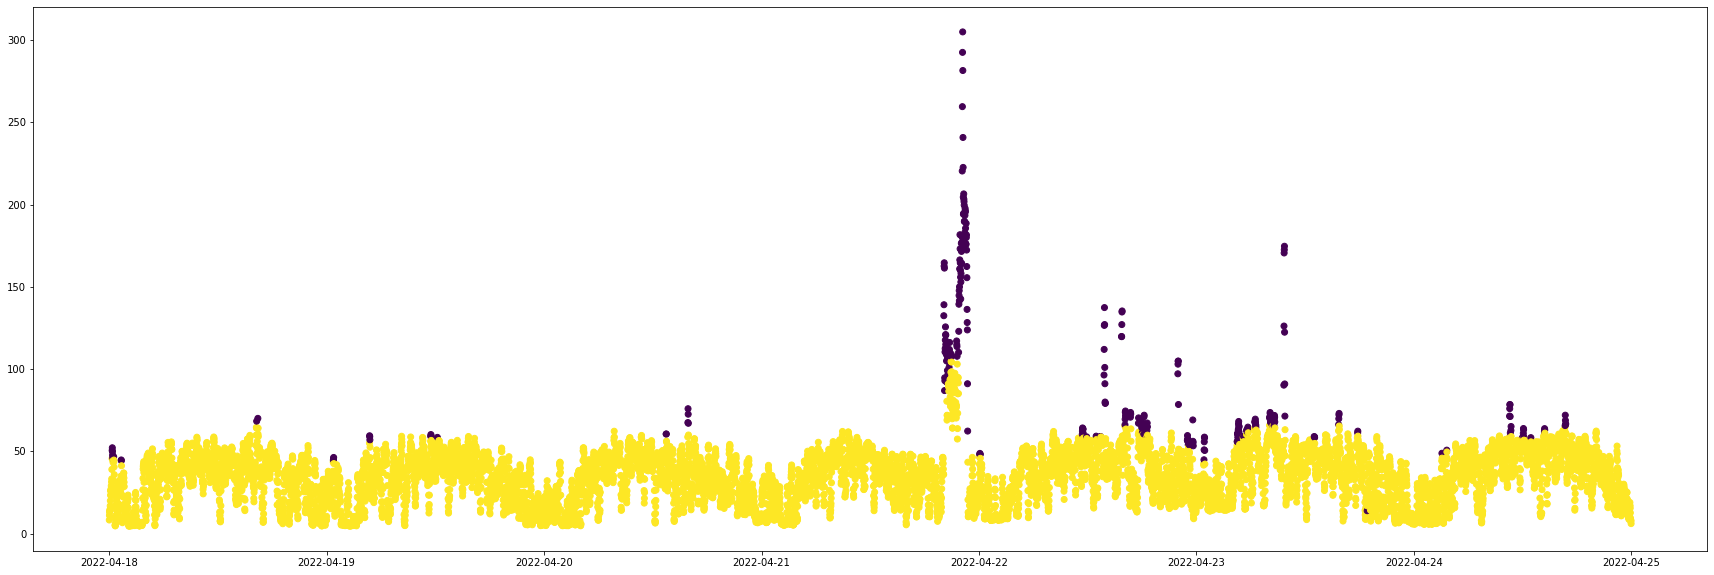

In [ ]:
plt.figure(figsize=(30,10))
plt.scatter(df_avg['timestamp'], df_avg['processed'], c=y_pred)
plt.show()

0.01 0.0001
102


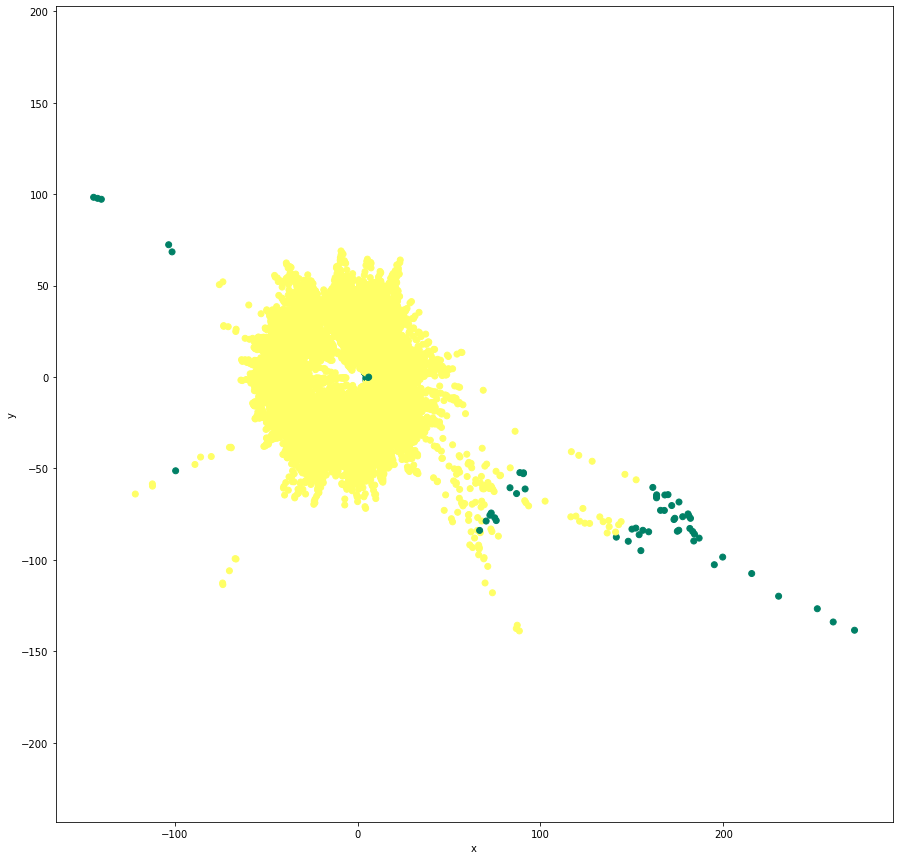

-----
0.01 0.001
100


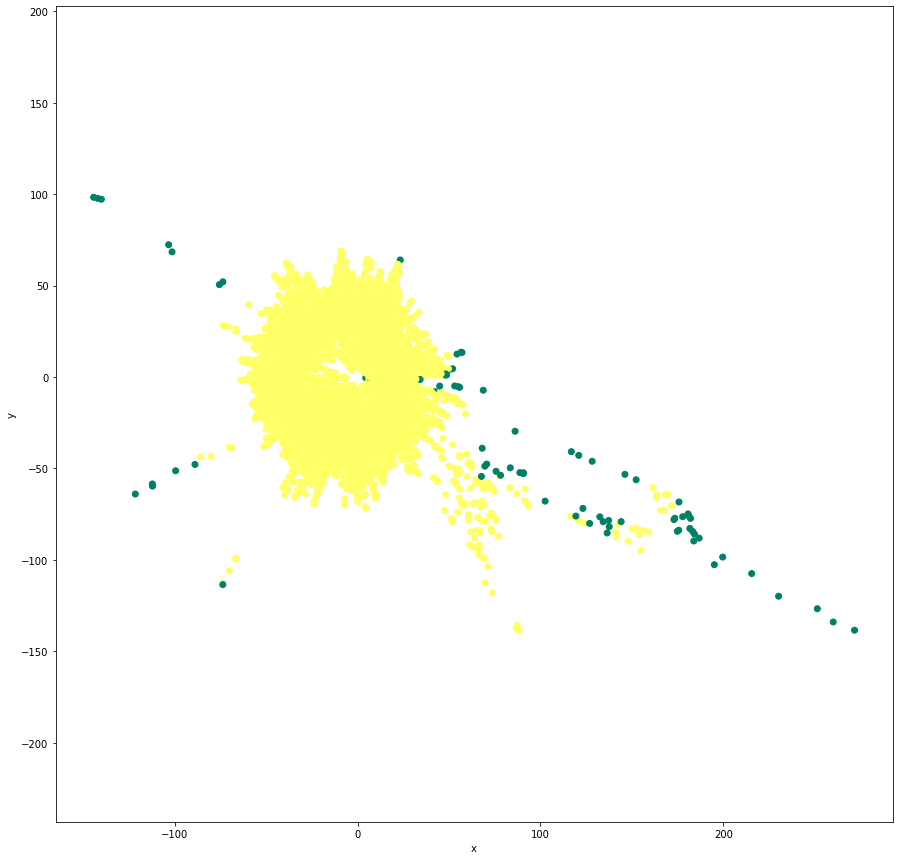

-----
0.01 0.01
124


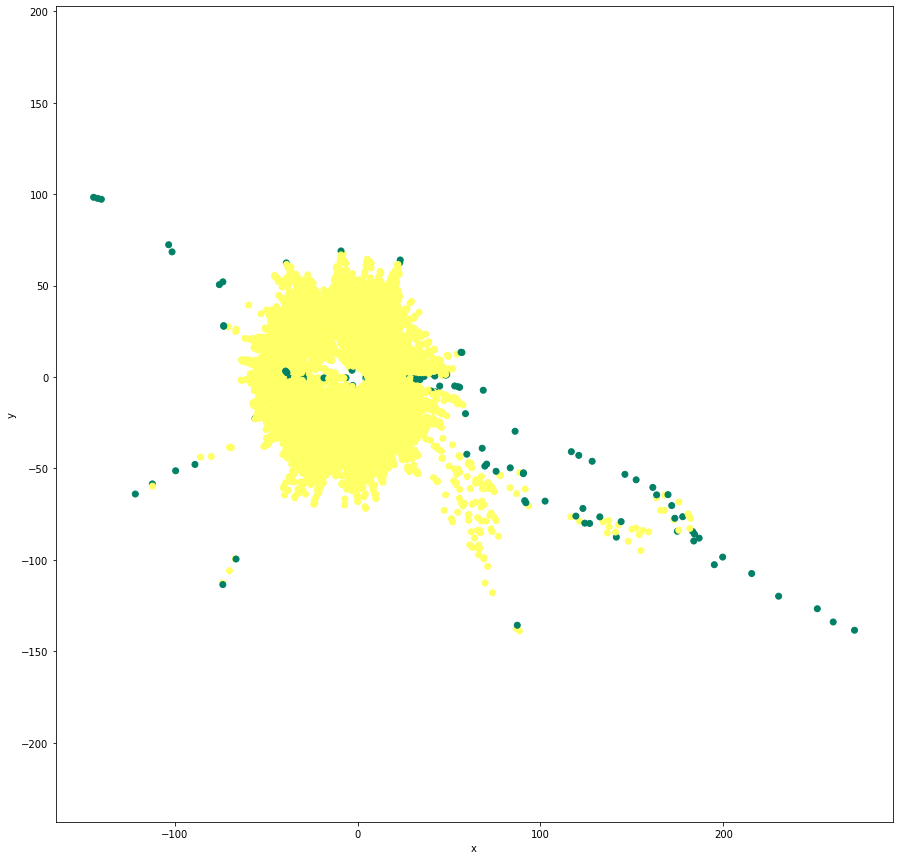

-----
0.1 0.0001
1009


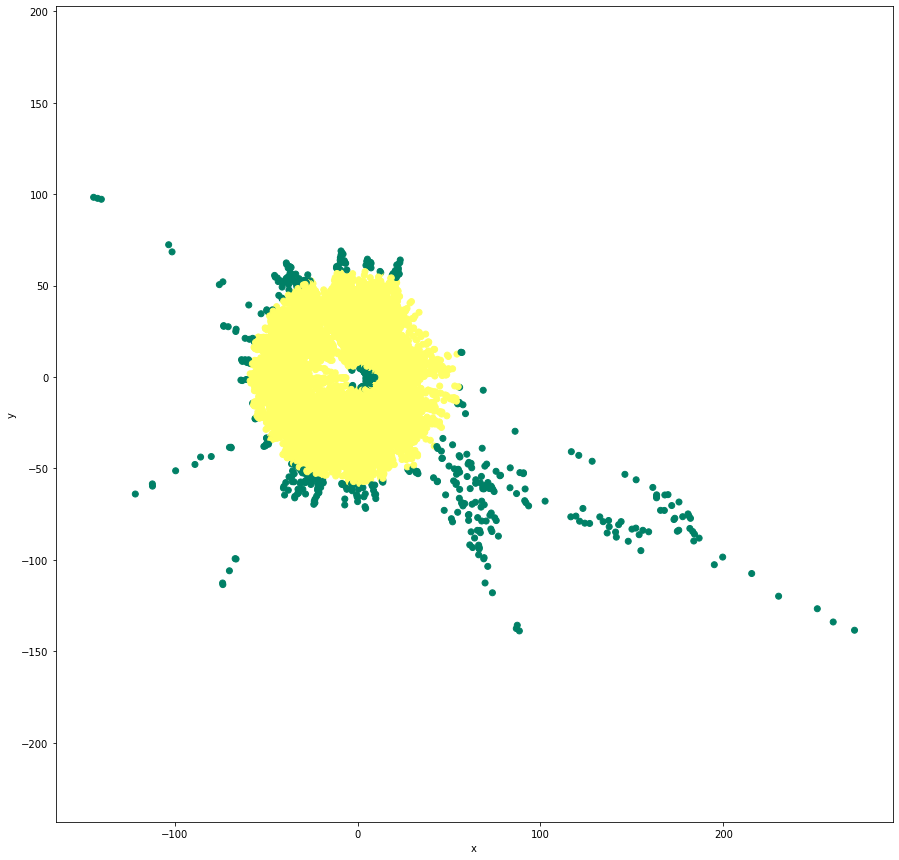

-----
0.1 0.001
1009


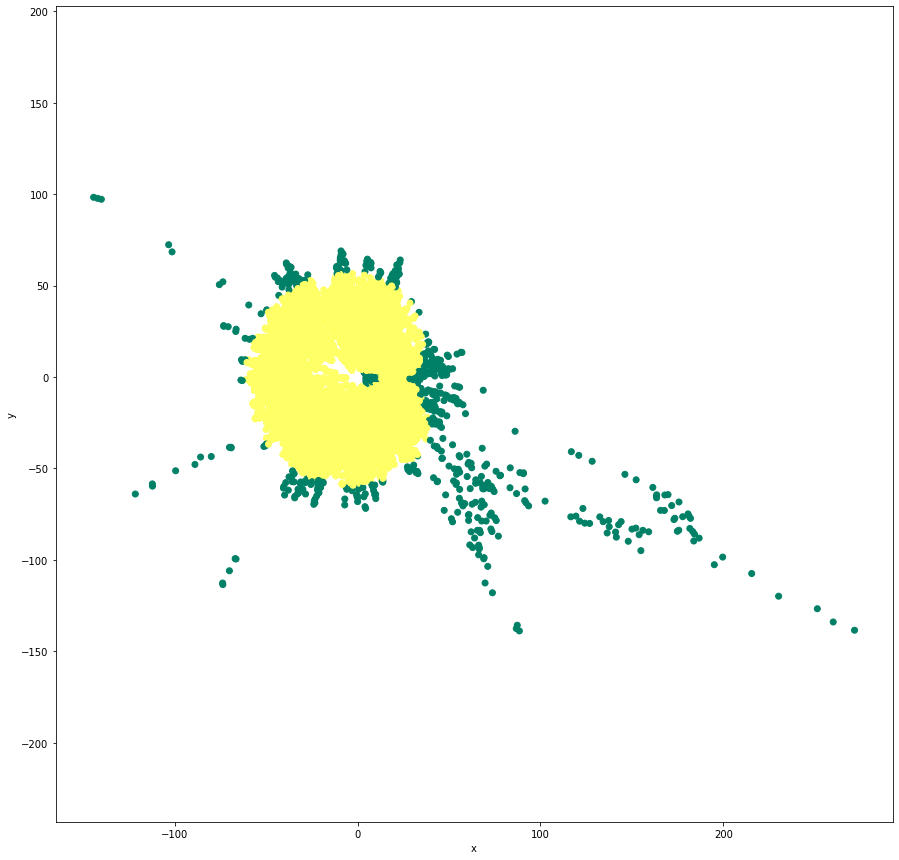

-----
0.1 0.01
1008


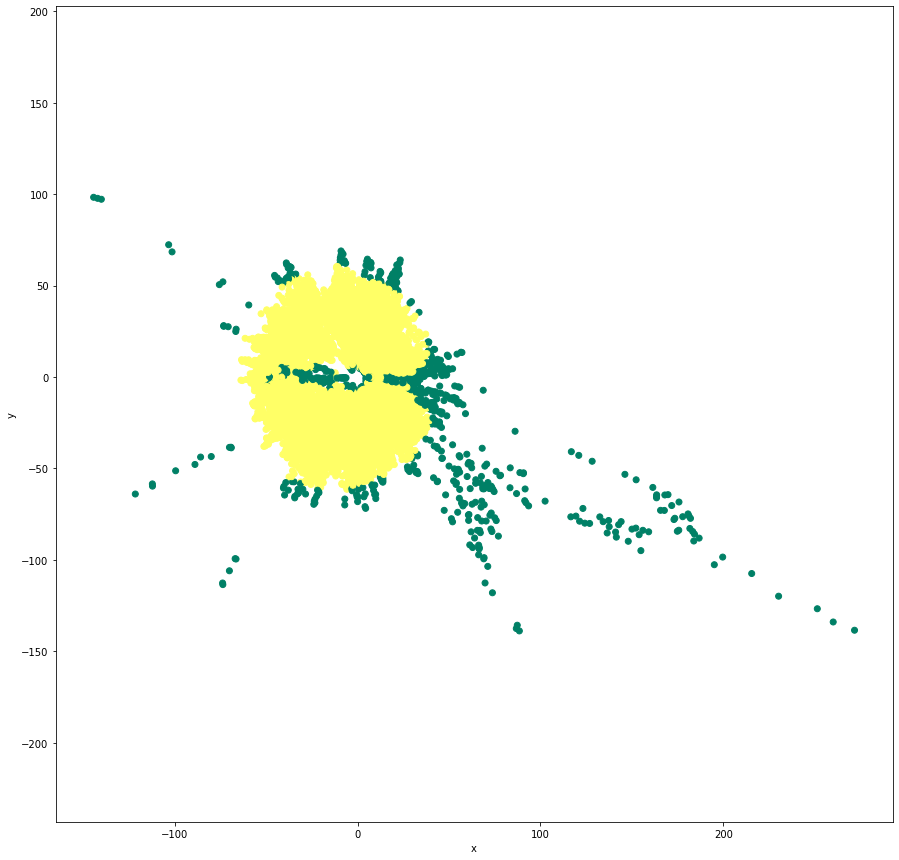

-----
0.5 0.0001
5044


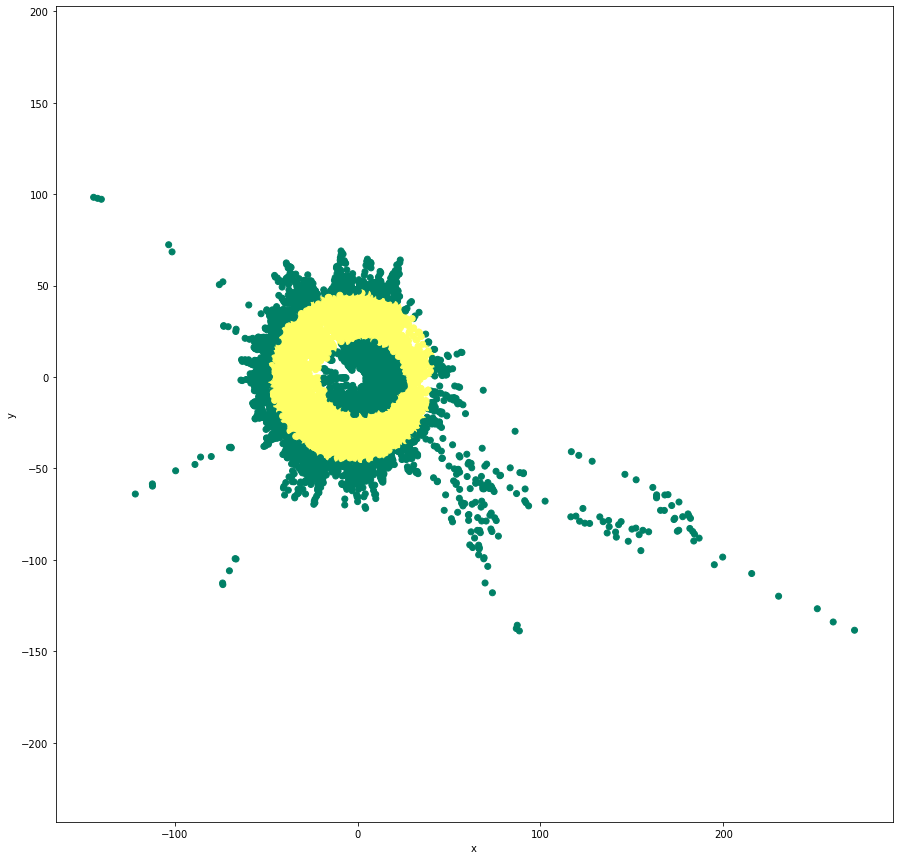

-----
0.5 0.001
5043


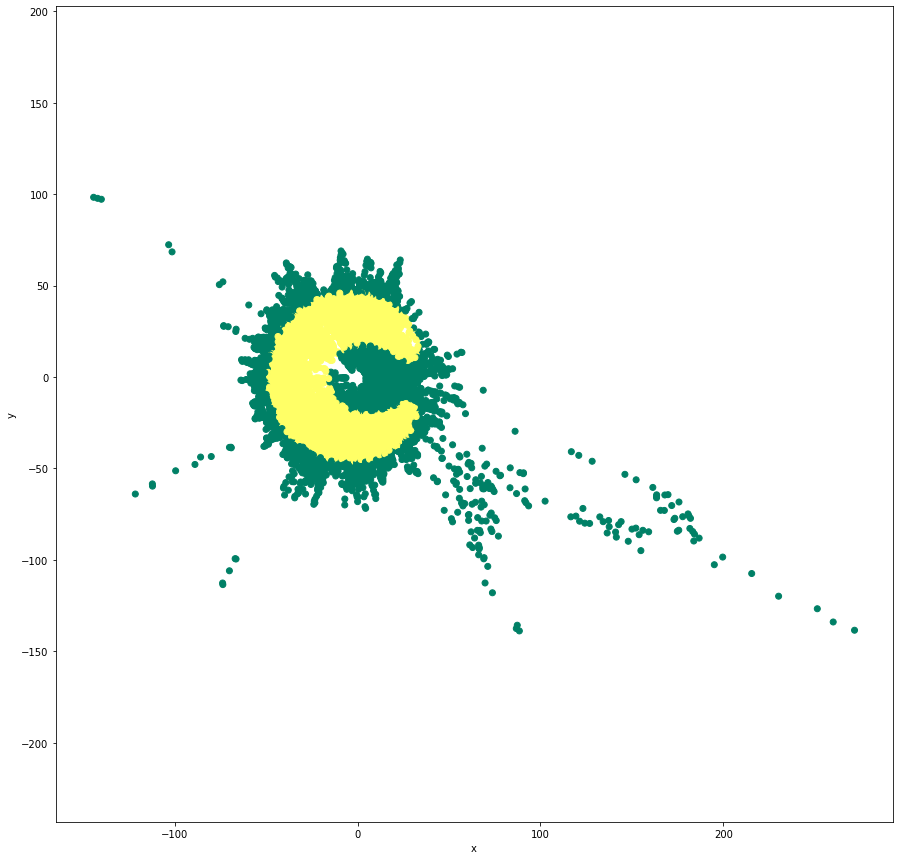

-----
0.5 0.01
5044


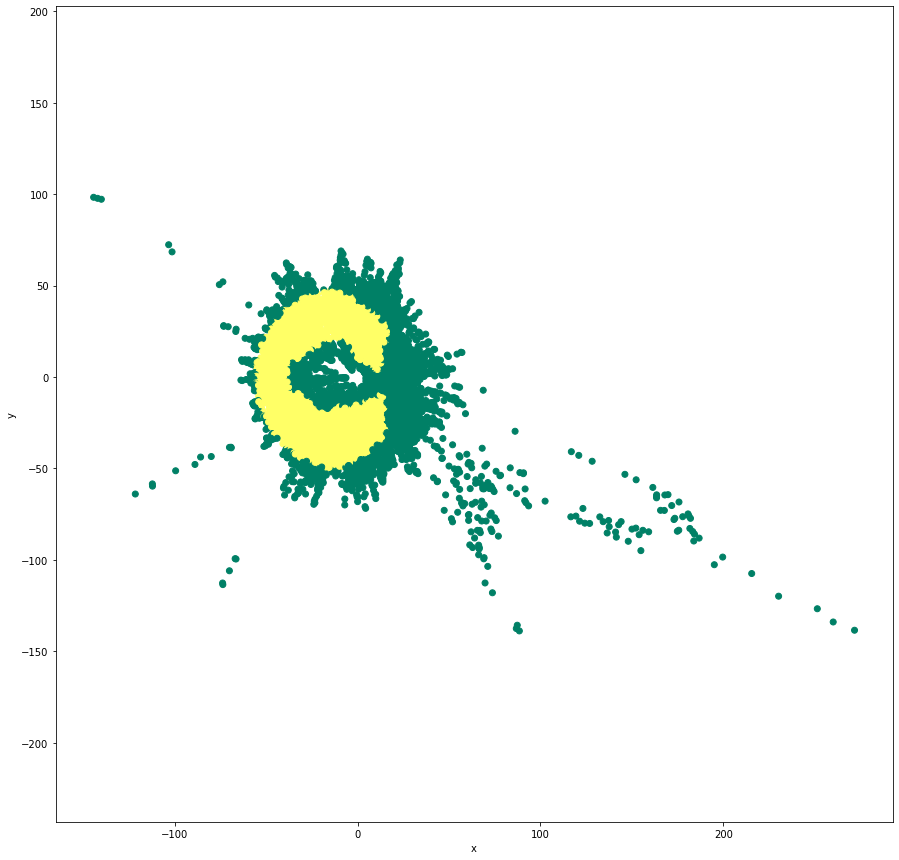

-----


In [ ]:
for nu in [0.01 , 0.1, 0.5]:
    for gamma in [0.0001, 0.001, 0.01,]:
        print(nu, gamma)
        # detect outliers using one-class SVM
        clf = OneClassSVM(nu=nu, gamma=gamma, kernel='rbf')
        y_pred = clf.fit_predict(df_out)

        print(y_pred[y_pred == -1].size)
        # show 2d plot with df_out and y_pred with equal axes

        plt.figure(figsize=(15,15))
        plt.scatter(x, y, c=y_pred, cmap='summer')
        plt.xlabel('x')
        plt.ylabel('y')
        # equal axis
        plt.axis('equal')
        plt.show()
        print("-----")

## Z-score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/def-au1t/AGH_8_SISI/master/processed_data_rpi2.csv')
# sort by timestamp
df.sort_values(by=['timestamp'], inplace=True)
# convert timesyamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
# get only cpu 0
df = df[df['cpu'] == 0]
df

,cpu,timestamp,processed
0,0,2022-04-13 10:09:18.838000128,44.107407
1,0,2022-04-13 10:10:18.838000128,42.885185
2,0,2022-04-13 10:11:18.838000128,40.933637
3,0,2022-04-13 10:12:18.838000128,42.015282
4,0,2022-04-13 10:13:18.838000128,42.270370
...,...,...,...
20169,0,2022-04-27 10:05:18.838000128,37.181481
20170,0,2022-04-27 10:06:18.838000128,37.741020
20171,0,2022-04-27 10:07:18.838000128,41.189041
20172,0,2022-04-27 10:08:18.838000128,40.966970


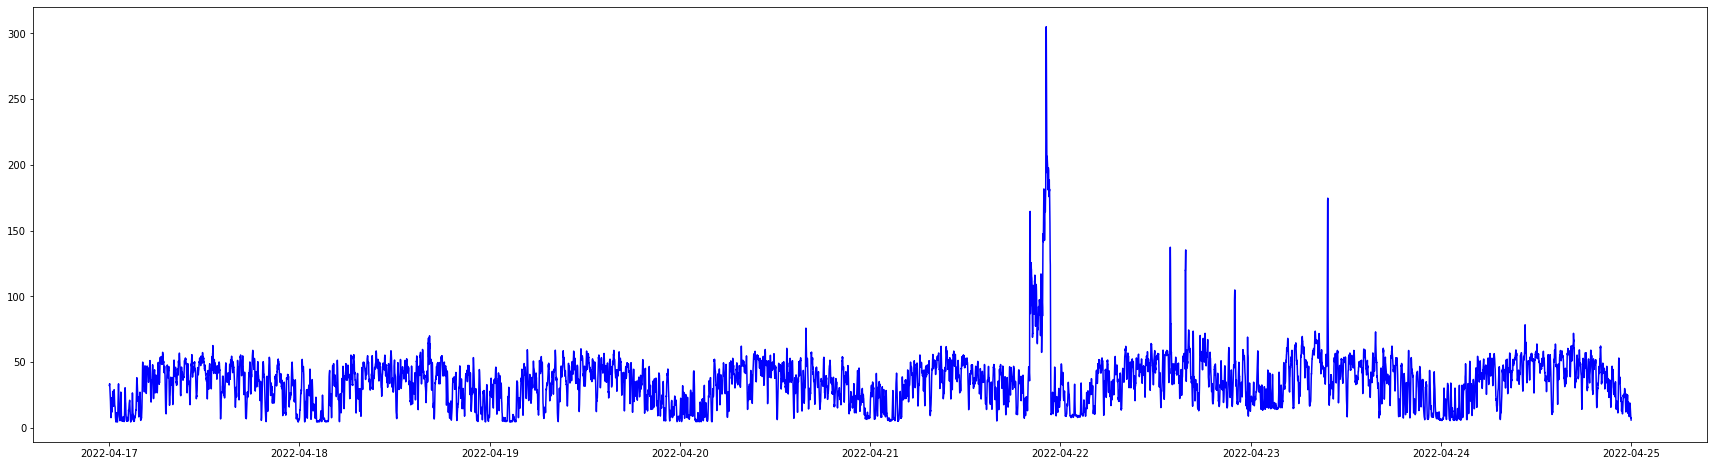

In [ ]:
df_range = df[(df['timestamp'] > '2022-04-17') & (df['timestamp'] < '2022-04-25')]

plt.figure(figsize=(30, 8))
plt.plot(df_range['timestamp'], df_range['processed'], 'b-')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

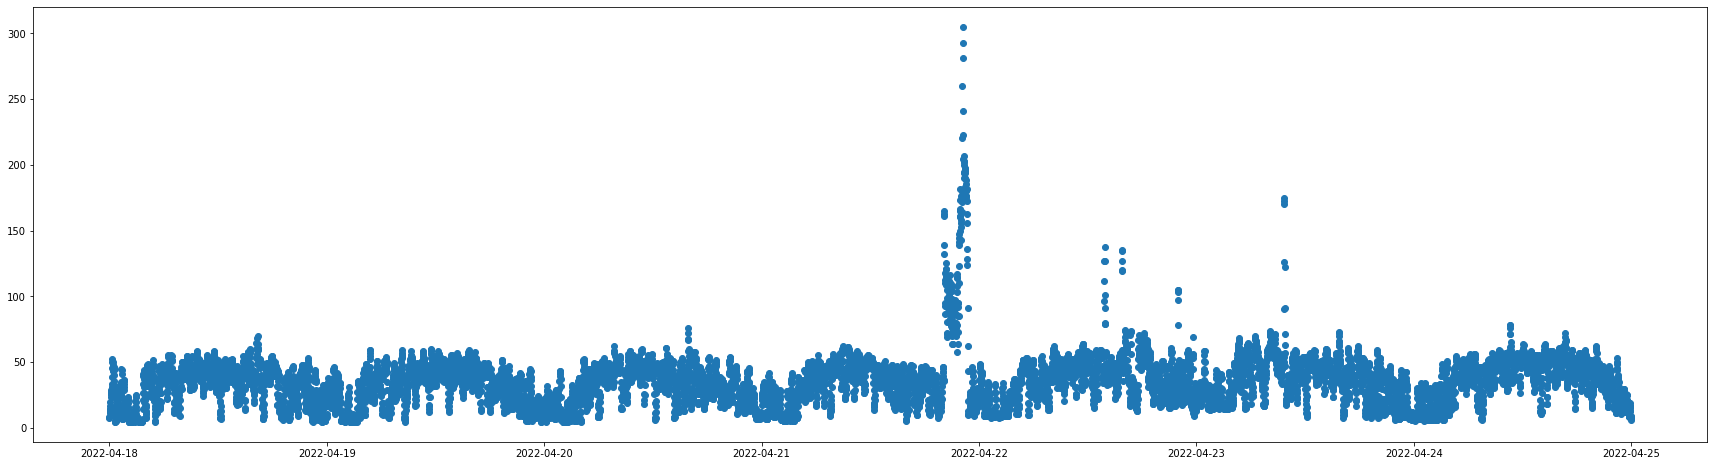

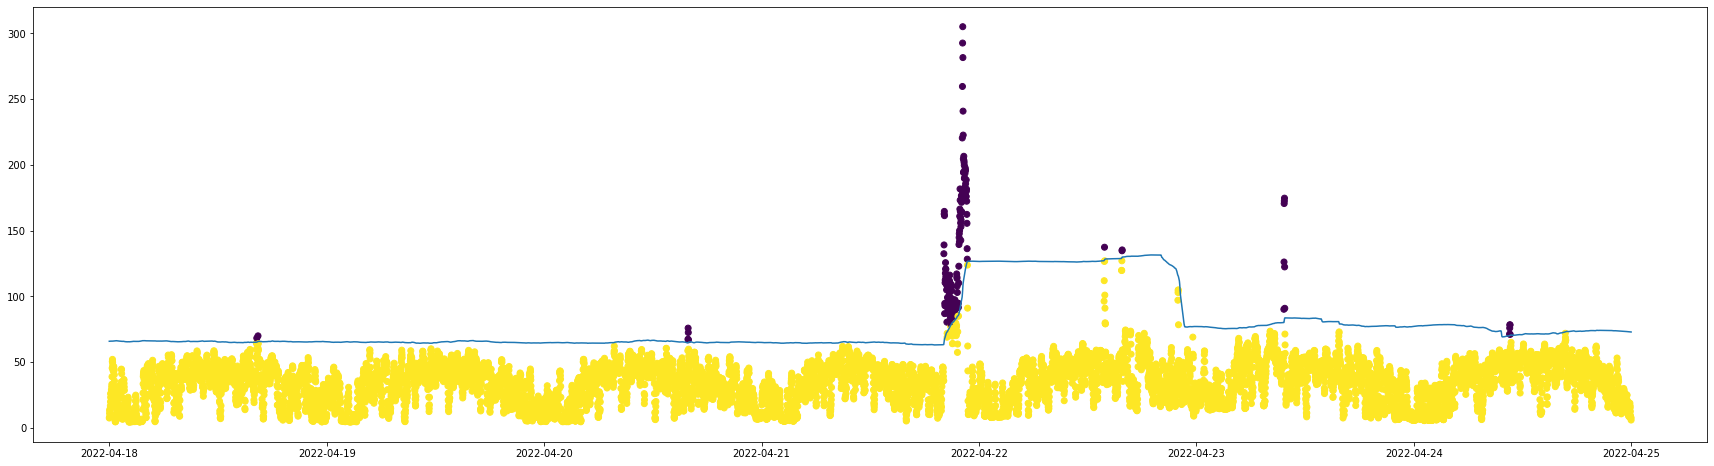

In [ ]:
# calulate z-score using data from last n points
n = 1440
detection_step = 2.3
df_range['z_score'] = (df_range['processed'] - df_range['processed'].rolling(n).mean()) / df_range['processed'].rolling(n).std()
df_range['anomaly'] = df_range['z_score'] < detection_step
df_range['upper_bound'] = (df_range['processed'].rolling(n).mean()) + detection_step * (df_range['processed'].rolling(n).std())

# cut off first n points
df_without_window = df_range[n:]

# plot z-score and processed 
plt.figure(figsize=(30, 8))
# plt.plot(df_without_window['timestamp'], df_without_window['z_score'], 'b-')
plt.scatter(df_without_window['timestamp'], df_without_window['processed'])
plt.show()

plt.figure(figsize=(30, 8))
# colormap for anomalies
plt.scatter(df_without_window['timestamp'], df_without_window['processed'], c=df_without_window['anomaly'])
plt.plot(df_without_window['timestamp'], df_without_window['upper_bound'])

# K-means

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/def-au1t/AGH_8_SISI/master/processed_data_rpi2.csv')
# sort by timestamp
df.sort_values(by=['timestamp'], inplace=True)
# convert timesyamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp']*1000000000)
# get only cpu 0
df = df[df['cpu'] == 0]
# add col with hour
df['hour'] = df['timestamp'].dt.hour + df['timestamp'].dt.minute/60
df = df[(df['timestamp'] > '2022-04-18') & (df['timestamp'] < '2022-04-25')]
df

,cpu,timestamp,processed,hour
6595,0,2022-04-18 00:00:18.838000128,8.225987,0.000000
6596,0,2022-04-18 00:01:18.838000128,11.037078,0.016667
6597,0,2022-04-18 00:02:18.838000128,12.925830,0.033333
6598,0,2022-04-18 00:03:18.838000128,13.922119,0.050000
6599,0,2022-04-18 00:04:18.838000128,13.737037,0.066667
...,...,...,...,...
16677,0,2022-04-24 23:55:18.838000128,9.414710,23.916667
16678,0,2022-04-24 23:56:18.838000128,8.118519,23.933333
16679,0,2022-04-24 23:57:18.838000128,7.422250,23.950000
16680,0,2022-04-24 23:58:18.838000128,7.896238,23.966667


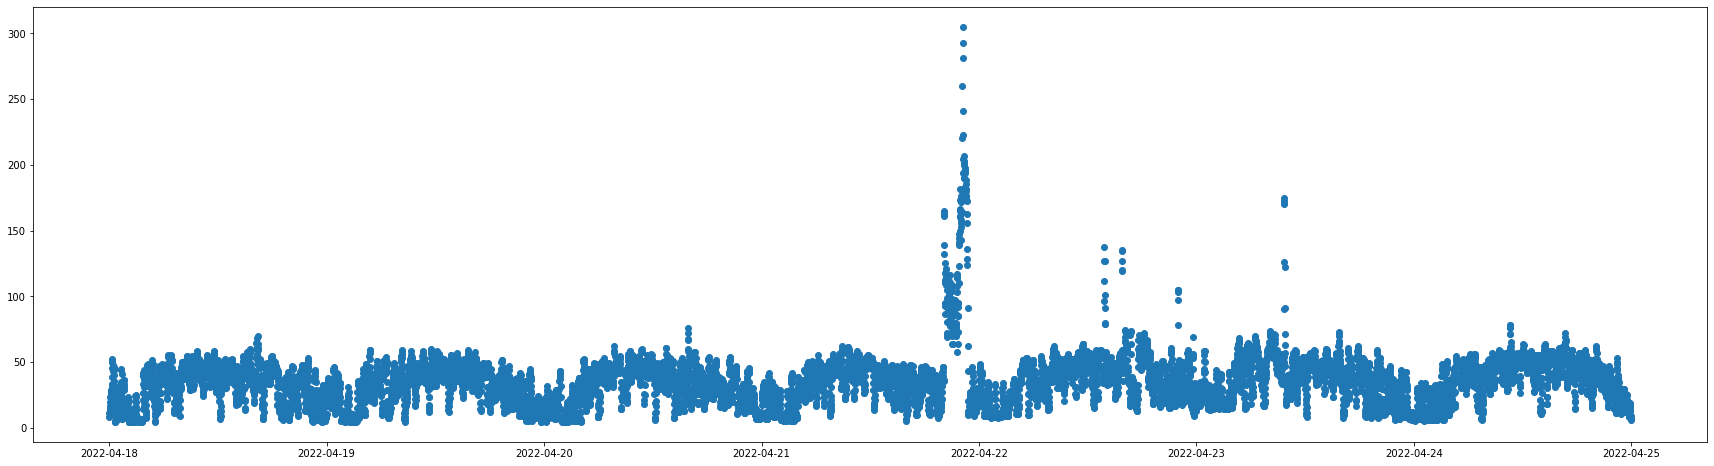

In [ ]:
plt.figure(figsize=(30, 8))
plt.scatter(df['timestamp'], df['processed'])
plt.show()

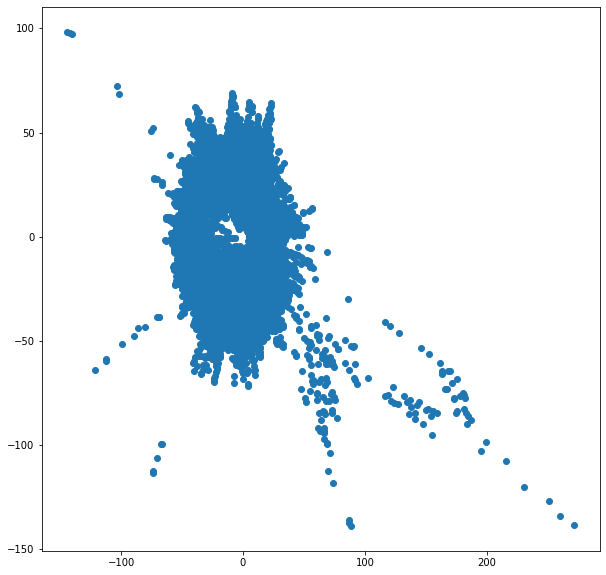

In [ ]:
from math import pi

# convert to 2d polar corrdinate system where r is processed value
# 2pi = 24
# alpha = hour
r = df['processed']
alpha = (df['hour'] * 2 * pi ) / 24

# convert r and alpha to cartesian coordinates and save in result
x = r*np.cos(alpha)
y = r*np.sin(alpha)

df_out = pd.DataFrame(columns=['x', 'y'])
df_out['x'] = x
df_out['y'] = y

# plot x and y
plt.figure(figsize=(10,10))
plt.scatter(df_out['x'], df_out['y'], cmap='summer')
plt.show()

finding outliers using k-means

In [ ]:
# find cluster centers
from sklearn.cluster import KMeans

def find_centers(data, n_clusters):
  centers = KMeans(n_clusters = n_clusters).fit(data).cluster_centers_
  centers_df = pd.DataFrame(centers, columns = ['x','y'])

  plt.figure(figsize=(10,10))
  plt.scatter(data['x'], data['y'], c='blue')
  plt.scatter(centers_df['x'], centers_df['y'], c='red')

  plt.show()
  return centers

In [ ]:
# find outliers
from scipy.spatial import distance_matrix

def find_outliers(data, centers, threshold):
  distances = distance_matrix(data, centers)
  distances = distances.min(axis=1)
  outliers = distances < threshold
  
  return outliers

In [ ]:
def kmeans_anomaly_detection(data, n_clusters, threshold):
  centers = find_centers(data, n_clusters)
  outliers = find_outliers(data, centers, threshold)  
  plt.figure(figsize=(10,10))
  plt.scatter(data['x'], data['y'], c=outliers)
  plt.show()
  return outliers

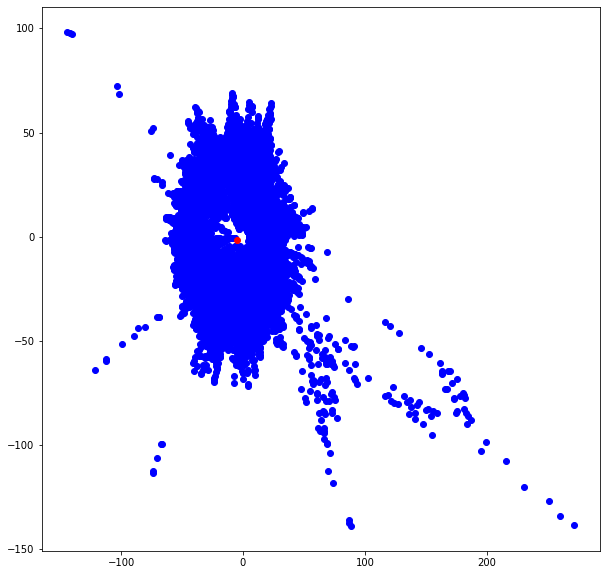

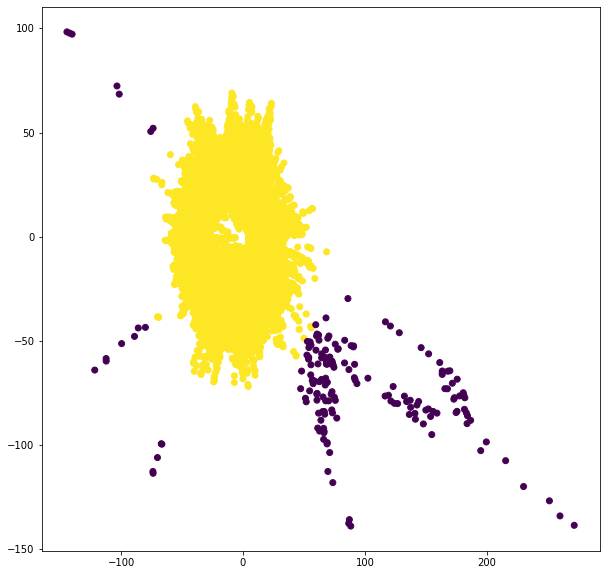

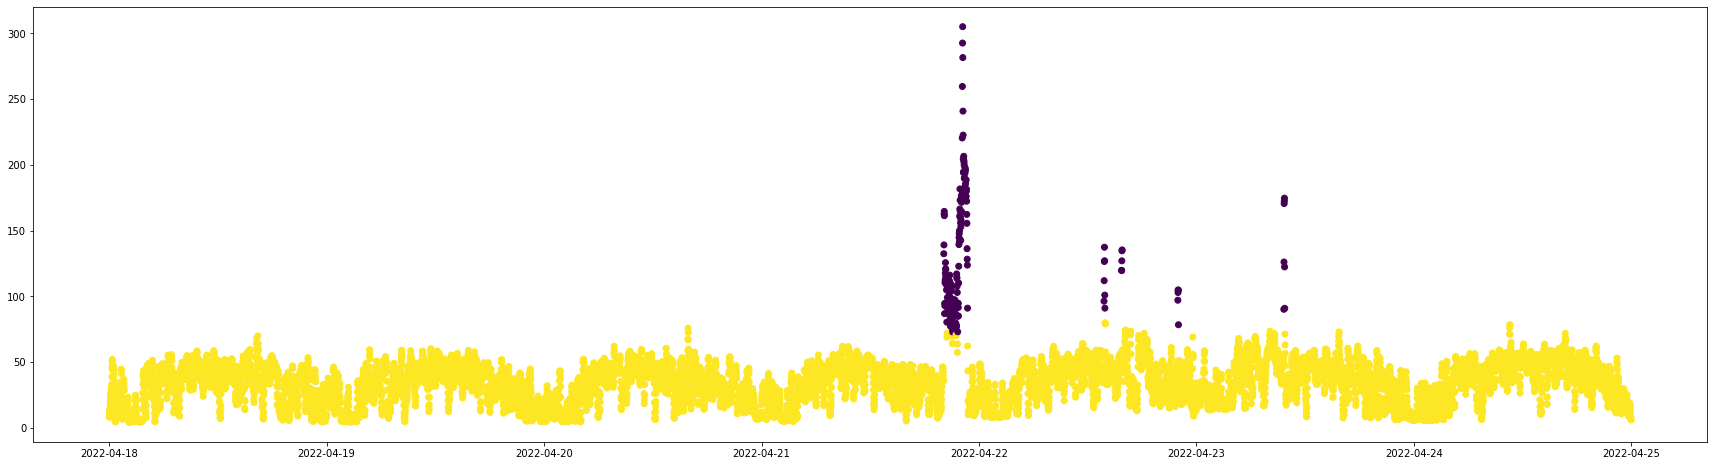

In [ ]:
outliers = kmeans_anomaly_detection(df_out, 1, 75)
plt.figure(figsize=(30, 8))
plt.scatter(df['timestamp'], df['processed'], c=outliers)
plt.show()

# k-NN

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/def-au1t/AGH_8_SISI/master/processed_data_rpi2.csv')
df.sort_values(by=['timestamp'], inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp']*1000000000)
df['hour'] = df['timestamp'].dt.hour + df['timestamp'].dt.minute/60
df = df[df['cpu'] == 0]
df = df[(df['timestamp'] > '2022-04-18') & (df['timestamp'] < '2022-04-25')]

In [ ]:
from sklearn.neighbors import NearestNeighbors

data = df[['timestamp', 'processed']]
data['timestamp'] = pd.to_datetime(data['timestamp'])    
data['timestamp'] = (data['timestamp'] - data['timestamp'].min())  / np.timedelta64(1,'m')
X = data[['timestamp', 'processed']].values
nbrs = NearestNeighbors(n_neighbors = 20)
nbrs.fit(X)
distances, indexes = nbrs.kneighbors(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


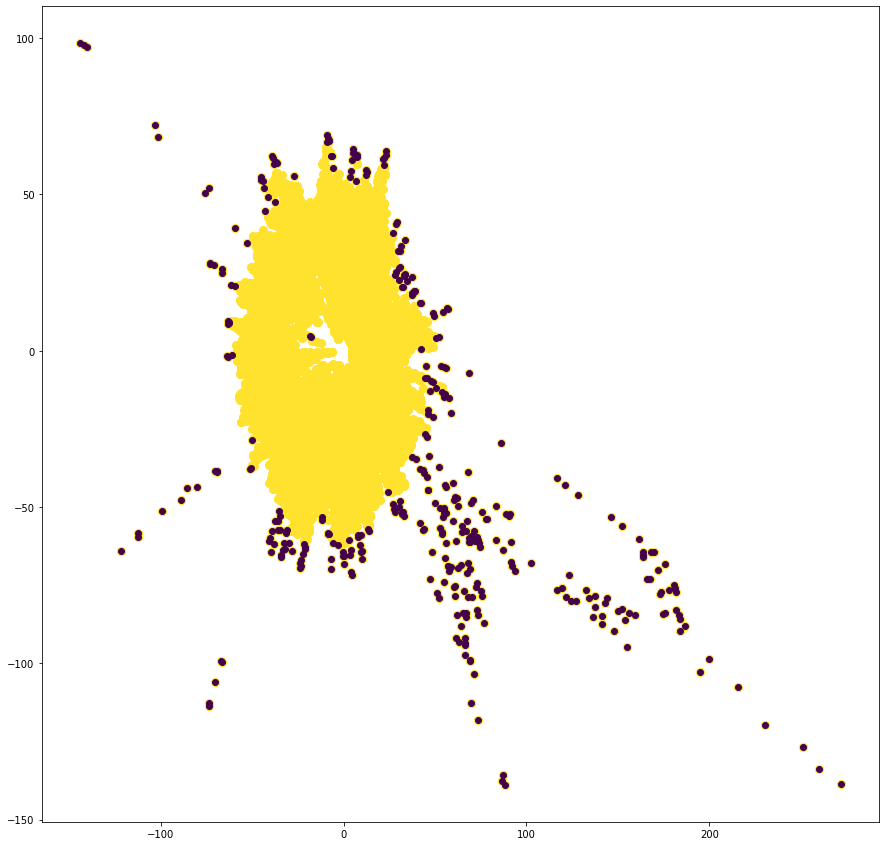

In [ ]:
from math import pi

r = df['processed']
alpha = (df['hour'] * 2 * pi ) / 24

x = r*np.cos(alpha)
y = r*np.sin(alpha)

df_out = pd.DataFrame(columns=['x', 'y'])
df_out['x'] = x
df_out['y'] = y

X = df_out.values
nbrs = NearestNeighbors(n_neighbors = 20)
nbrs.fit(X)
distances, indexes = nbrs.kneighbors(X)
outlier_index = np.where(distances.mean(axis = 1) > 4)
outlier_index
outlier_values = df_out.iloc[outlier_index]
plt.figure(figsize=(15, 15))
plt.scatter(X[:, 0], X[:, 1], color = "#ffe22d", s = 65)
plt.scatter(outlier_values["x"], outlier_values["y"], color = "#42034c")

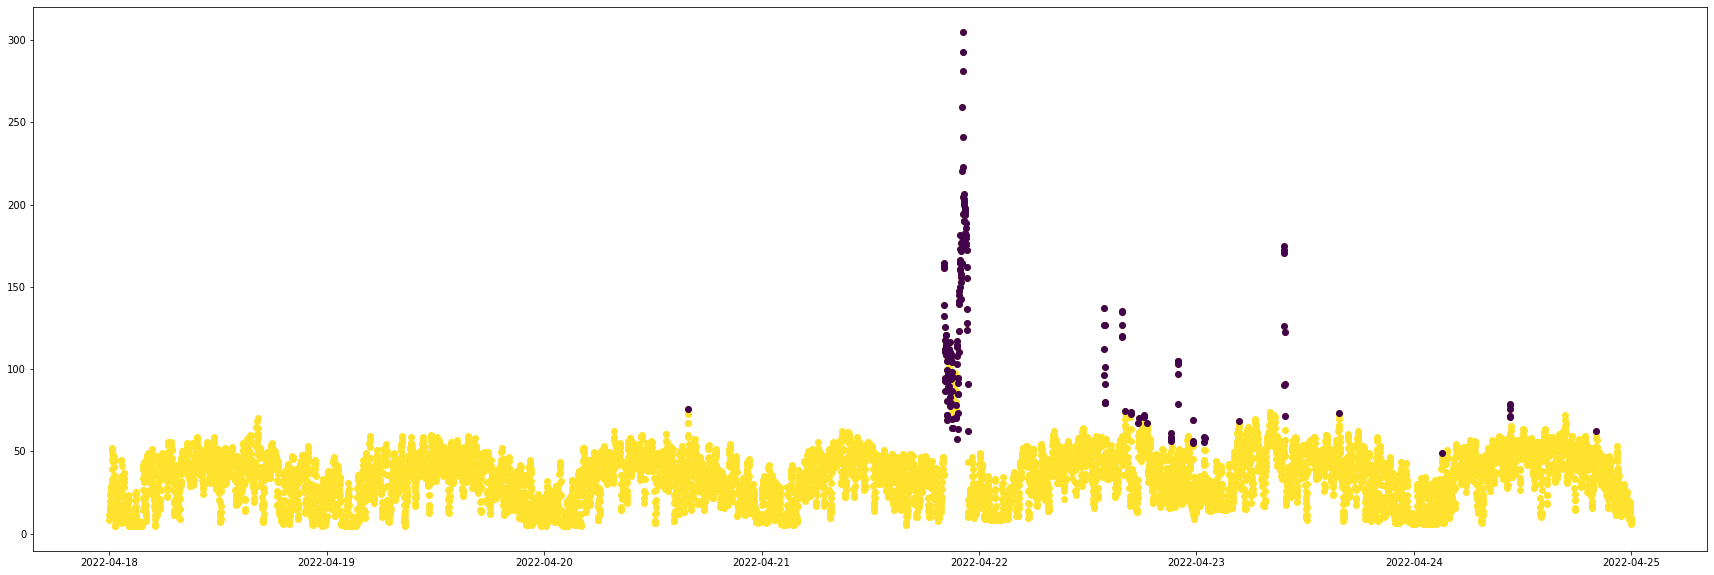

In [ ]:
outlier_index = np.where(distances.mean(axis = 1) > 7)
outlier_index
outlier_values = df.iloc[outlier_index]
plt.figure(figsize=(30, 10))
plt.scatter(df["timestamp"], df["processed"], color = "#ffe22d")
plt.scatter(outlier_values["timestamp"], outlier_values["processed"], color = "#42034c")

## Isolation forest


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/def-au1t/AGH_8_SISI/master/processed_data_rpi2.csv')
df.sort_values(by=['timestamp'], inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp']*1000000000)
df['hour'] = df['timestamp'].dt.hour + df['timestamp'].dt.minute/60
df = df[df['cpu'] == 0]
df = df[(df['timestamp'] > '2022-04-18') & (df['timestamp'] < '2022-04-25')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


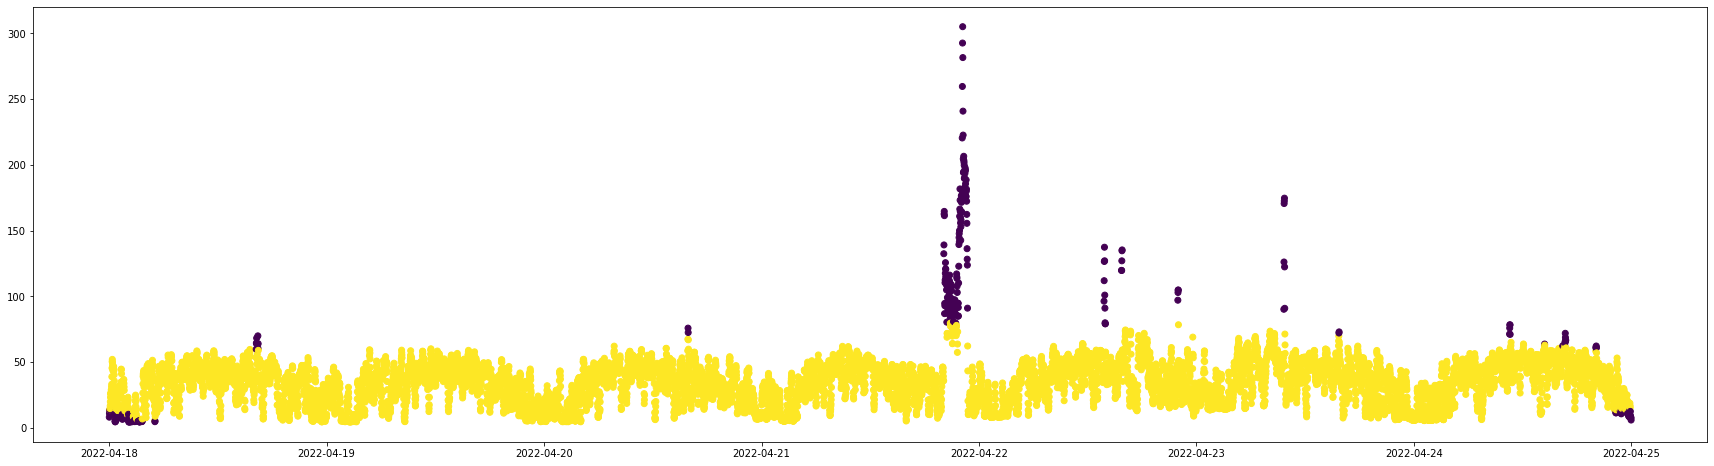

In [ ]:

# find outliers using LOF
from sklearn.ensemble import IsolationForest


data = df[['timestamp', 'processed']]
data['timestamp'] = pd.to_datetime(data['timestamp'])    
data['timestamp'] = (data['timestamp'] - data['timestamp'].min())  / np.timedelta64(1,'m')
X = data[['timestamp', 'processed']].values

cls = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.030), max_features=1.0, bootstrap=True, n_jobs=-1, random_state=42, verbose=0)
outliers = cls.fit_predict(X)
plt.figure(figsize=(30, 8))
plt.scatter(df["timestamp"], df["processed"], c=outliers)


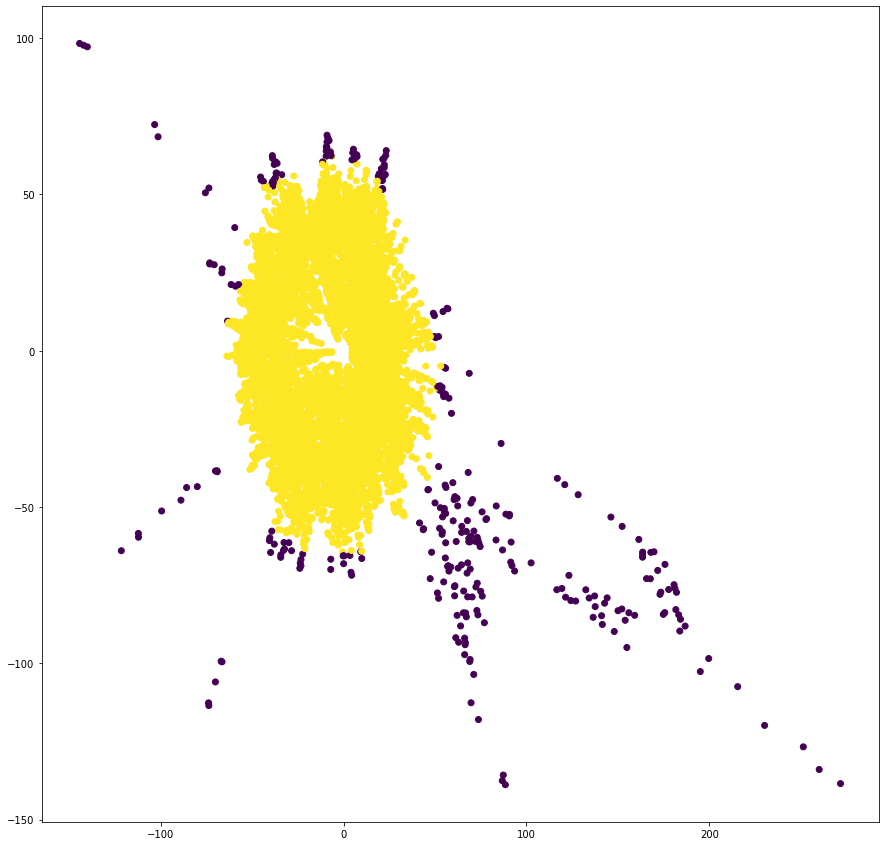

In [ ]:
X = df_out.values

cls = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.030), max_features=1.0, bootstrap=True, n_jobs=-1, random_state=42, verbose=0)
outliers = cls.fit_predict(X)
plt.figure(figsize=(15, 15))
plt.scatter(X[:, 0], X[:, 1], c=outliers)

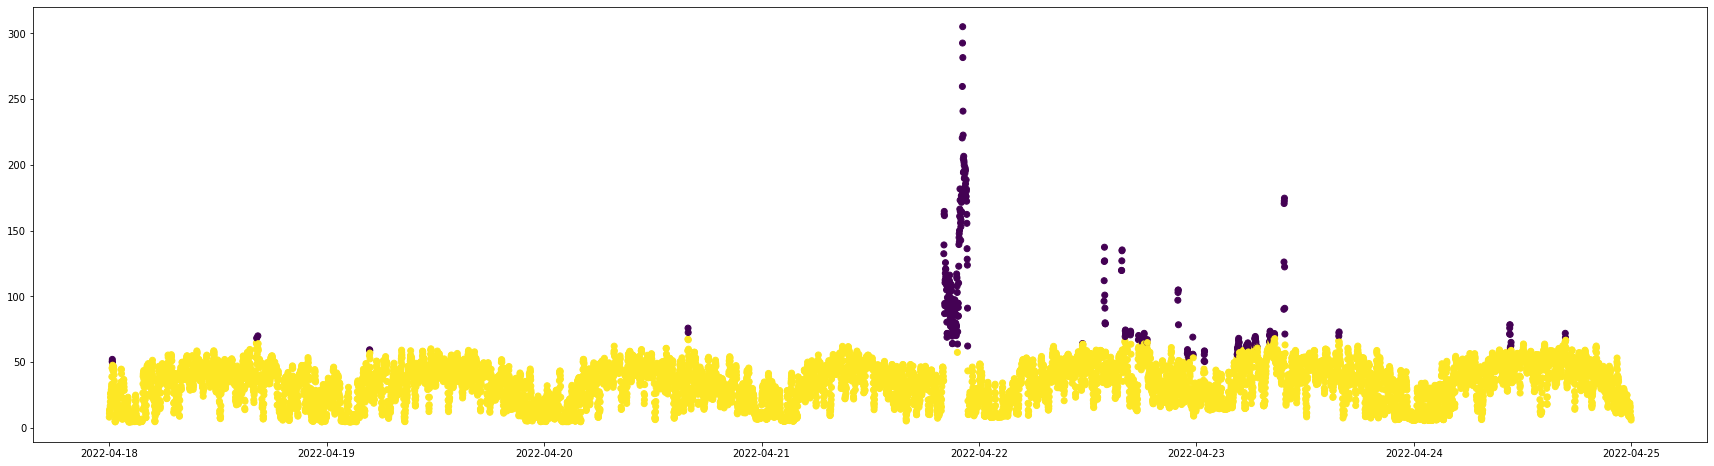

In [ ]:
plt.figure(figsize=(30, 8))
plt.scatter(df["timestamp"], df["processed"], c=outliers)

# Gaussian mixture

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/def-au1t/AGH_8_SISI/master/processed_data_rpi2.csv')
# sort by timestamp
df.sort_values(by=['timestamp'], inplace=True)
# convert timesyamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp']*1000000000)
# get only cpu 0
df = df[df['cpu'] == 0]
# add col with hour
df['hour'] = df['timestamp'].dt.hour + df['timestamp'].dt.minute/60
df = df[(df['timestamp'] > '2022-04-18') & (df['timestamp'] < '2022-04-25')]
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,cpu,timestamp,processed,hour
6595,0,2022-04-18 00:00:18.838000128,8.225987,0.000000
6596,0,2022-04-18 00:01:18.838000128,11.037078,0.016667
6597,0,2022-04-18 00:02:18.838000128,12.925830,0.033333
6598,0,2022-04-18 00:03:18.838000128,13.922119,0.050000
6599,0,2022-04-18 00:04:18.838000128,13.737037,0.066667
...,...,...,...,...
16677,0,2022-04-24 23:55:18.838000128,9.414710,23.916667
16678,0,2022-04-24 23:56:18.838000128,8.118519,23.933333
16679,0,2022-04-24 23:57:18.838000128,7.422250,23.950000
16680,0,2022-04-24 23:58:18.838000128,7.896238,23.966667


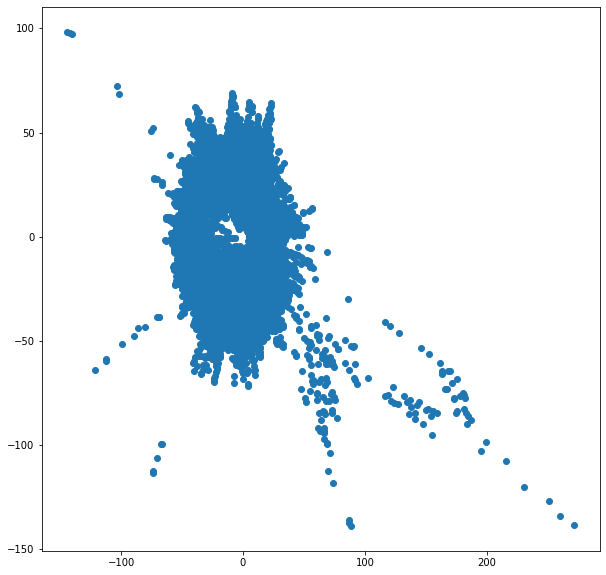

In [ ]:
from math import pi

# convert to 2d polar corrdinate system where r is processed value
# 2pi = 24
# alpha = hour
r = df['processed']
alpha = (df['hour'] * 2 * pi ) / 24

# convert r and alpha to cartesian coordinates and save in result
x = r*np.cos(alpha)
y = r*np.sin(alpha)

df_out = pd.DataFrame(columns=['x', 'y'])
df_out['x'] = x
df_out['y'] = y

# plot x and y
plt.figure(figsize=(10,10))
plt.scatter(df_out['x'], df_out['y'], cmap='summer')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
from numpy import quantile

QUANTILE = .02

def find_outliers_using_gaussina_mixture(data):
  gm = GaussianMixture(n_components=1, covariance_type='full').fit(data)
  scores = gm.score_samples(data)
  thresh = quantile(scores, QUANTILE)
  outliers = scores < thresh
  plt.figure(figsize=(10,10))
  plt.scatter(data['x'], data['y'], c=outliers)
  plt.show()
  return outliers




[-8.65111119 -8.70309959 -8.74378042 ... -8.63764351 -8.64533595
 -8.61757127]


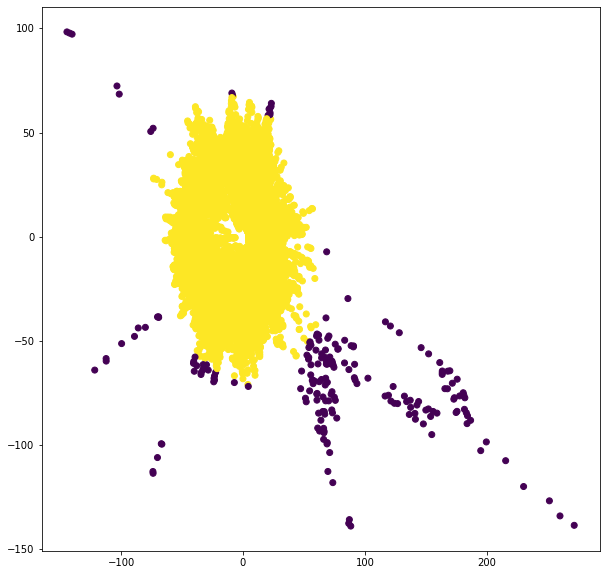

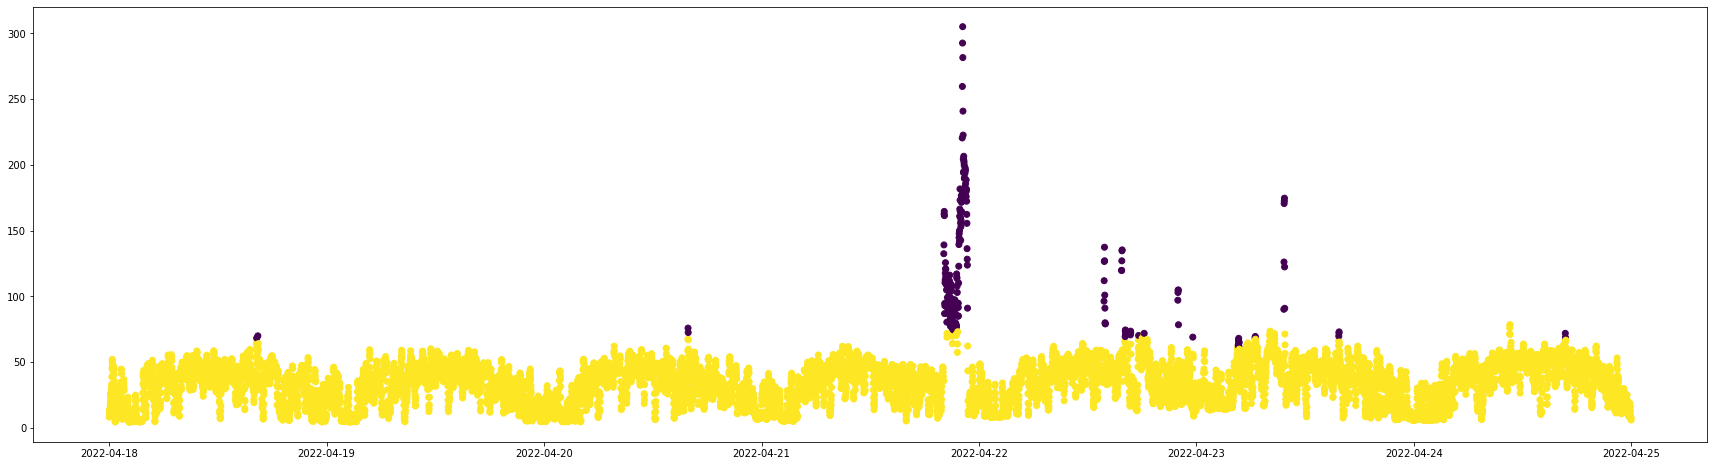

In [ ]:
outliers = find_outliers_using_gaussina_mixture(df_out)
plt.figure(figsize=(30, 8))
plt.scatter(df['timestamp'], df['processed'], c=outliers)
plt.show()

# Mahalanobis Distance

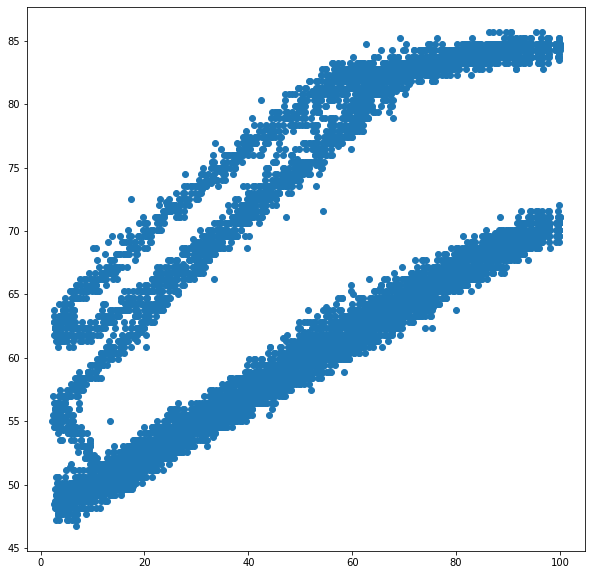

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('https://raw.githubusercontent.com/def-au1t/AGH_8_AI-Project/master/out_rpi_fan_25_steps1_baseline.csv')
data1 = pd.read_csv('https://raw.githubusercontent.com/def-au1t/AGH_8_AI-Project/master/out_rpi_fan_25_steps1_covered.csv')
data = pd.concat([data, data1])
plt.figure(figsize=(10,10))
plt.scatter(data['usage'], data['temperature'])
plt.show()

In [ ]:
import scipy as sp

from matplotlib import patches
from scipy.stats import chi2

def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = data[['usage', 'temperature']]
# df_x['mahala'] = mahalanobis(x=df_x, data=df_x[['usage', 'temperature']])
df_x.head()

,usage,temperature
0,4.65,49.173
1,5.20,48.686
2,4.15,48.199
3,4.20,48.199
4,4.75,48.686


In [ ]:
df = df_x.to_numpy()

covariance  = np.cov(df , rowvar=False)
covariance_pm1 = np.linalg.matrix_power(covariance, -1)
centerpoint = np.mean(df , axis=0)

In [ ]:
distances = []
for i, val in enumerate(df):
      p1 = val
      p2 = centerpoint
      distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
      distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.95, df.shape[1])

# Index of outliers
outlierIndexes = np.where(distances > cutoff )

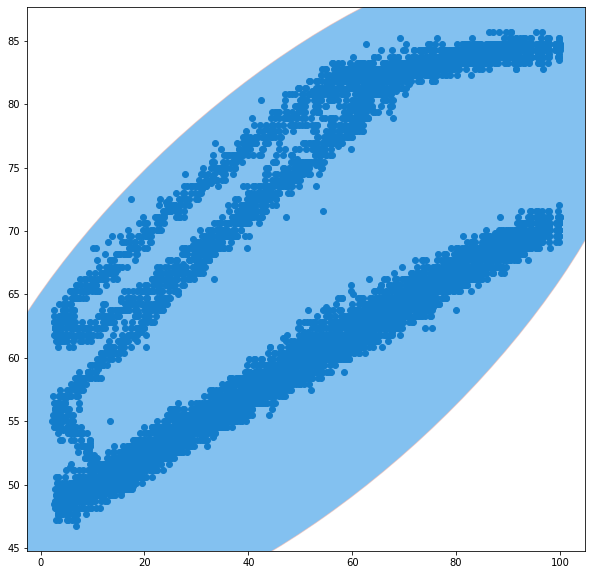

In [ ]:
## Finding ellipse dimensions 
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

In [ ]:
ellipse.contains_point((20, 40), radius=0)

False